In [1]:
import pandas as pd

# --- Step 1: Read tweets file ---
tweet_ids = []
tweet_texts = []

with open(r"F:\pbl research\new research paper\Sarcasm_tweets.txt", "r", encoding="utf-8") as f:
    lines = [line.strip() for line in f if line.strip()]
    for i in range(0, len(lines), 2):
        tweet_ids.append(lines[i])
        tweet_texts.append(lines[i + 1])

tweets_df = pd.DataFrame({"tweet_id": tweet_ids, "text": tweet_texts})

# --- Step 2: Read labels file ---
label_ids = []
labels = []

with open(r"F:\pbl research\new research paper\Sarcasm_tweet_truth.txt", "r", encoding="utf-8") as f:
    lines = [line.strip() for line in f if line.strip()]
    for i in range(0, len(lines), 2):
        label_ids.append(lines[i])
        labels.append(lines[i + 1])

labels_df = pd.DataFrame({"tweet_id": label_ids, "label": labels})

# --- Step 3: Merge and save
merged = pd.merge(tweets_df, labels_df, on="tweet_id")
merged.to_csv(r"F:\pbl research\new research paper\Sarcasm_combined.csv", index=False, encoding="utf-8")

print("✅ Combined dataset created successfully!")

✅ Combined dataset created successfully!


In [2]:
df = pd.read_csv(r"F:\pbl research\new research paper\Sarcasm_combined.csv")
print(df.head())

             tweet_id                                               text label
0  866871160725794816          Triple Talaq par Burbak Kuchh nahi bolega    NO
1  880356789358743553  Batao ye uss site pr se akki sir ke verdict ni...   YES
2  877751493889105920  Hindu baheno par julam bardas nahi hoga @Tripl...    NO
3  901806457871466496  Naa bhai.. aisa nhi hai.. mere handle karne se...    NO
4  866264330748219392  #RememberingRajiv aaj agar musalman auraten tr...    NO


In [3]:
df["label"] = df["label"].map({"YES": 1, "NO": 0})


In [4]:
import re

def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # remove links
    text = re.sub(r"@\w+|#\w+", "", text)                # remove mentions/hashtags
    text = re.sub(r"[^a-zA-Z\s]", "", text)              # remove punctuation/numbers
    text = text.lower().strip()
    return text

df["clean_text"] = df["text"].apply(clean_text)


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df["clean_text"], df["label"], test_size=0.2, random_state=42,stratify=df["label"])

# Check class distribution after split
print("Training set class distribution:\n", y_train.value_counts())
print("Testing set class distribution:\n", y_test.value_counts())


Training set class distribution:
 label
0    3797
1     403
Name: count, dtype: int64
Testing set class distribution:
 label
0    949
1    101
Name: count, dtype: int64


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


📌 Logistic Regression Results:
Training Accuracy: 0.9042857142857142
Testing Accuracy: 0.9038095238095238

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       949
           1       0.00      0.00      0.00       101

    accuracy                           0.90      1050
   macro avg       0.45      0.50      0.47      1050
weighted avg       0.82      0.90      0.86      1050



Confusion Matrix




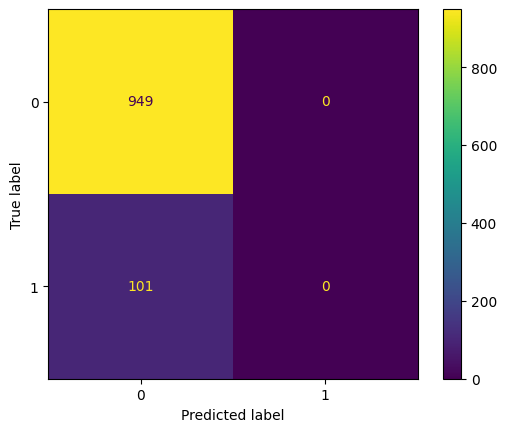

In [7]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(max_iter=200)
model.fit(X_train_vec, y_train)

# Predictions
y_train_pred_lr = model.predict(X_train_vec)  # training predictions
y_test_pred_lr= model.predict(X_test_vec)    # testing predictions

# Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_lr)
test_accuracy = accuracy_score(y_test, y_test_pred_lr)
log_reg_acc = test_accuracy


print("📌 Logistic Regression Results:")
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Classification report for test set
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_test_pred_lr, zero_division=0))
print("\n")


print("Confusion Matrix")
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test_vec, y_test)
print("\n")


📌 Support Vector Machine (SVM) Results:
Training Accuracy: 0.9543
Testing Accuracy: 0.9038

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       949
           1       0.50      0.02      0.04       101

    accuracy                           0.90      1050
   macro avg       0.70      0.51      0.49      1050
weighted avg       0.87      0.90      0.86      1050



Confusion Matrix




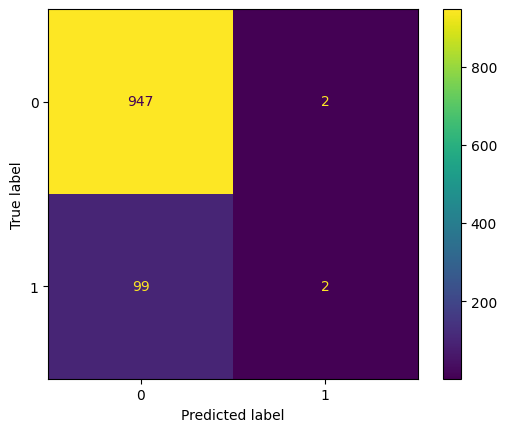

In [8]:
#svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize SVM model with a linear kernel
svm_model = SVC(kernel='linear', random_state=42)

# Train the model
svm_model.fit(X_train_vec, y_train)

# Predict on training and test data
y_train_pred_svm = svm_model.predict(X_train_vec)
y_test_pred_svm = svm_model.predict(X_test_vec)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_svm)
test_accuracy = accuracy_score(y_test, y_test_pred_svm)
svm_acc = test_accuracy


# Print results
print("📌 Support Vector Machine (SVM) Results:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_test_pred_svm))
print("\n")

print("Confusion Matrix")
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(svm_model, X_test_vec, y_test)
print("\n")

📌 Random Forest Results:
Training Accuracy: 0.9995
Testing Accuracy: 0.9019
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       949
           1       0.25      0.01      0.02       101

    accuracy                           0.90      1050
   macro avg       0.58      0.50      0.48      1050
weighted avg       0.84      0.90      0.86      1050



Confusion Matrix




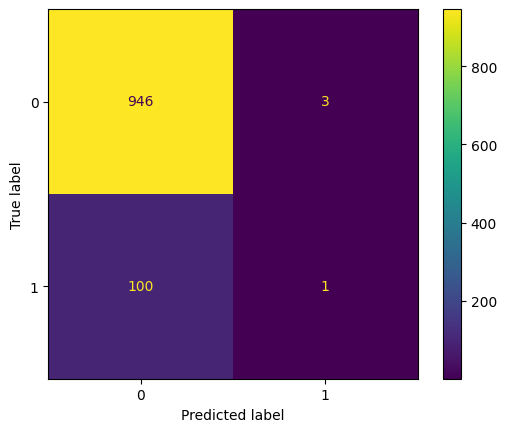

In [9]:
#random forset
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_vec, y_train)

# Predict on test data
y_train_pred_rf = rf_model.predict(X_train_vec)
y_test_pred_rf = rf_model.predict(X_test_vec)

# Calculate accuracy
train_accuracy = accuracy_score(y_train,y_train_pred_rf)
test_accuracy = accuracy_score(y_test, y_test_pred_rf)

rf_acc = test_accuracy


# Evaluate model
print("📌 Random Forest Results:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print(classification_report(y_test, y_test_pred_rf))
print("\n")

print("Confusion Matrix")
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(rf_model, X_test_vec, y_test)
print("\n")


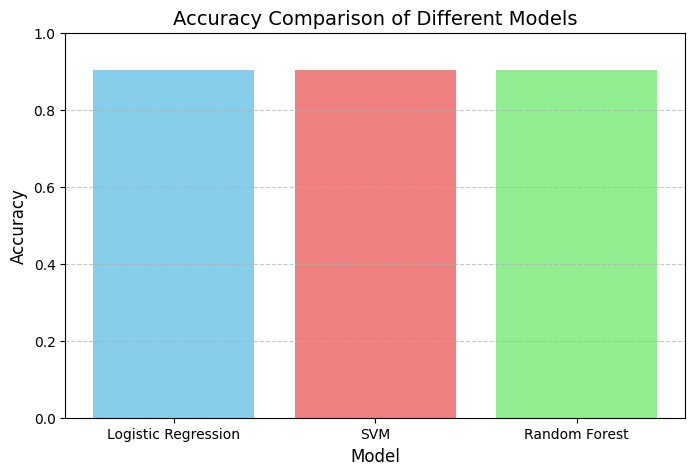

In [10]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'SVM', 'Random Forest']
accuracies = [log_reg_acc, svm_acc, rf_acc]

plt.figure(figsize=(8,5))
plt.bar(models, accuracies, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Accuracy Comparison of Different Models', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
